In [3]:
import matplotlib.pyplot as plt
import numpy as np
import kneed
import pickle
import os

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA, FastICA

from datasets import *

In [67]:
X, y = load_term_deposits()

/home/vinit/.local/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3218: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/home/vinit/.local/lib/python3.9/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/vinit/.local/lib/python3.9/site-packages/numpy/core/_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [68]:
from scipy.stats import kurtosis

In [70]:
k = kurtosis(X)

In [77]:
out = []
for n_components in [63]:
    ica = FastICA(n_components)
    X_trans = ica.fit_transform(X)
    out.append(X_trans)

/home/vinit/.local/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:519: UserWarning: n_components is too large: it will be set to 61
  warnings.warn(
/home/vinit/.local/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [78]:
for i in out:
    print(np.abs(kurtosis(i)).mean())

47.89944307018515


In [114]:
kmeans = KMeans()

In [116]:
kmeans.set_params(n_clusters=5)

KMeans(n_clusters=5)

In [118]:
kmeans.fit_predict(X).max()

4

In [254]:
cs = pd.read_csv('credit_score.csv')
cs.set_index('Customer_ID', inplace=True)

/tmp/ipykernel_22146/1303140048.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  cs = pd.read_csv('credit_score.csv')


In [255]:
first_id = cs[cs.Credit_Score == 'Poor'].groupby(level=0).agg({'ID': 'min'})
first_id.rename(columns={'ID': 'first_id'}, inplace=True)
last_id = cs[cs.Credit_Score != 'Poor'].groupby(level=0).agg({'ID': 'min'})
last_id.rename(columns={'ID': 'last_id'}, inplace=True)

In [256]:
cs = cs.join(first_id, how='left').join(last_id, how='left')

In [258]:
z = cs.last_id < cs.first_id

In [245]:
cs[['first_id', 'last_id']].dropna()

,first_id,last_id
Customer_ID,,


In [246]:
first_id.index

Index(['CUS_0x1000', 'CUS_0x100b', 'CUS_0x1018', 'CUS_0x102e', 'CUS_0x103e',
       'CUS_0x1048', 'CUS_0x1056', 'CUS_0x1075', 'CUS_0x107c', 'CUS_0x1096',
       ...
       'CUS_0xf7d', 'CUS_0xf8f', 'CUS_0xf91', 'CUS_0xf95', 'CUS_0xf9f',
       'CUS_0xfa4', 'CUS_0xfae', 'CUS_0xfbd', 'CUS_0xfc9', 'CUS_0xffc'],
      dtype='object', name='Customer_ID', length=5203)

In [251]:
cs.loc[first_id.index][['first_id']]

,first_id
Customer_ID,
CUS_0x1000,NaN
CUS_0x1000,NaN
CUS_0x1000,NaN
CUS_0x1000,NaN
CUS_0x1000,NaN
...,...
CUS_0xffc,NaN
CUS_0xffc,NaN
CUS_0xffc,NaN


In [4]:
def load_scores(key):
    data = pickle.load(open(f"readings/{key}.pkl", "rb"))
    data.sort()
    out = tuple(zip(*data))
    return out[0], np.array(out[1:])

In [53]:
def load_iter_scores(key):
    data = pickle.load(open(f"readings/{key}.pkl", "rb"))
    return (
        np.array(list(range(len(data['train_loss'])))) * 3+2,
        np.array(data['train_loss']),
        np.array(data['test_loss']),
    )

def load_trainsize_scores(key):
    data = pickle.load(open(f"readings/{key}.pkl", "rb"))
    return (
        np.array([0.2, 0.4, 0.6, 0.8, 0.99]),
        np.array(data['train_aucs']),
        np.array(data['test_aucs']),
        np.array(data['timings']),
    )

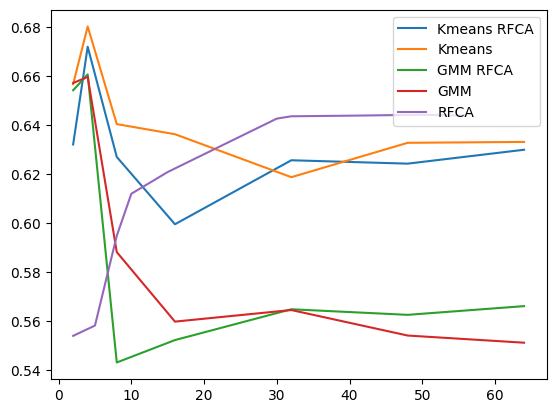

In [54]:
dataset = 'credit_score'

algo = 'pca'

x, y = load_scores(f'kmeans_{algo}_' + dataset)
plt.plot(x, y[1], label='Kmeans RFCA')

x, y = load_scores(f'kmeans_' + dataset)
plt.plot(x, y[1], label='Kmeans')

x, y = load_scores(f'gmm_{algo}_' + dataset)
plt.plot(x, y[1], label='GMM RFCA')

x, y = load_scores(f'gmm_' + dataset)
plt.plot(x, y[1], label='GMM')

x, y = load_scores(f'{algo}_' + dataset)
plt.plot(x, y[2], label='RFCA')

plt.legend()

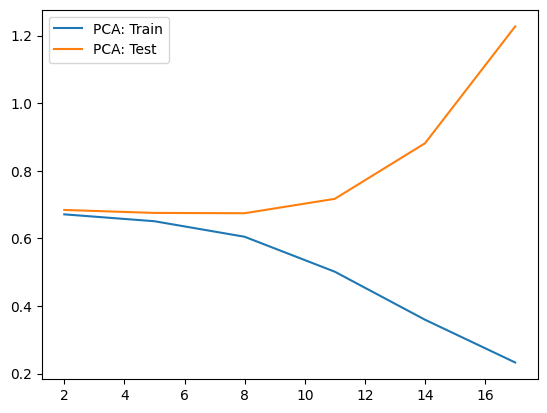

In [55]:

x, y1, y2 = load_iter_scores(f'iter_pca')
plt.plot(x, y1, label='PCA: Train')
plt.plot(x, y2, label='PCA: Test')

# x, y1, y2 = load_iter_scores(f'iter_ica')
# plt.plot(x, y1, label='ICA: Train')
# plt.plot(x, y2, label='ICA: Test')

# x, y1, y2 = load_iter_scores(f'iter_gmm_add_soft')
# plt.plot(x, y1, label='GMM Replace Soft: Train')
# plt.plot(x, y2, label='GMM Replace Soft: Test')
plt.legend()

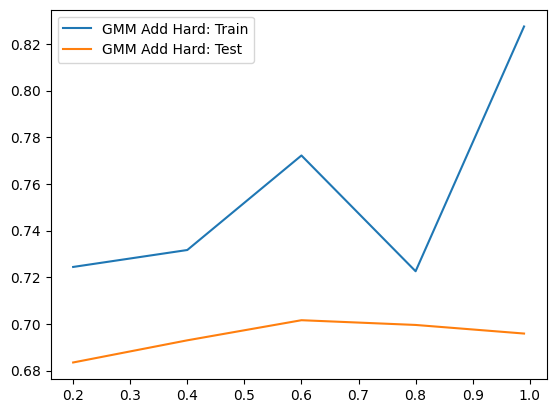

In [35]:
dataset = 'term_deposits'

algo = 'ica'

x, y1, y2, y3 = load_trainsize_scores(f'trainsize_rca_credit_score')
plt.plot(x, y1, label='GMM Add Hard: Train')
plt.plot(x, y2, label='GMM Add Hard: Test')


# x, y1, y2 = load_iter_scores(f'iter_gmm_replace_hard')
# plt.plot(x, y1, label='GMM Replace Hard: Train')
# plt.plot(x, y2, label='GMM Replace Hard: Test')

# x, y1, y2 = load_iter_scores(f'iter_gmm_replace_soft')
# plt.plot(x, y1, label='GMM Replace Soft: Train')
# plt.plot(x, y2, label='GMM Replace Soft: Test')

# x, y1, y2 = load_iter_scores(f'iter_gmm_add_soft')
# plt.plot(x, y1, label='GMM Replace Soft: Train')
# plt.plot(x, y2, label='GMM Replace Soft: Test')

plt.legend()

In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import FastICA, PCA
from evaluate import pr_auc_score

In [37]:
X, y = load_credit_score()

/home/vinit/.local/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [319]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [320]:
hidden_unit_sizes = [
    (512, 256, 128),
    (512, 128, 128),
    (256, 128, 64),
    (512, 256),
    (256, 128),
    (128, 64),
    (128,),
    (64,),
]

In [321]:
for s in hidden_unit_sizes:
    mlp = MLPClassifier(
        hidden_layer_sizes=s,
        activation="relu",
        early_stopping=True,
        batch_size=128,
    )
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict_proba(X_test)
    auc = pr_auc_score(y_test, y_pred)
    print(s, auc)

(512, 256, 128) 0.7213851025790791
(512, 128, 128) 0.7189449222071816
(256, 128, 64) 0.7128430331645216


/home/vinit/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


(512, 256) 0.71726238043235


/home/vinit/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


(256, 128) 0.7076214036941738


/home/vinit/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


(128, 64) 0.7043833128516345


/home/vinit/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


(128,) 0.6997949495923607
(64,) 0.7013100544540035


/home/vinit/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [336]:
from sklearn.random_projection import SparseRandomProjection

pca = SparseRandomProjection(40)
pca.fit(X_train, y_train)

SparseRandomProjection(n_components=40)

In [337]:
for s in hidden_unit_sizes:
    mlp = MLPClassifier(
        hidden_layer_sizes=s,
        activation="relu",
        batch_size=128,
        early_stopping=True,
        max_iter=100,
    )
    mlp.fit(pca.transform(X_train), y_train)
    y_pred = mlp.predict_proba(pca.transform(X_test))
    auc = pr_auc_score(y_test, y_pred)
    print(s, auc)

(512, 256, 128) 0.7049321805011689
(512, 128, 128) 0.7036955597594027
(256, 128, 64) 0.7138754863443365
(512, 256) 0.7114854830430505
(256, 128) 0.7080812713557064
(128, 64) 0.7058844287914244
(128,) 0.7018309014554068
(64,) 0.699338935757384


In [342]:
from sklearn.random_projection import SparseRandomProjection

pca = FastICA(5)
pca.fit(X_train, y_train)
Xt1 = pca.transform(X_train)
Xt2 = pca.transform(X_test)
for s in hidden_unit_sizes:
    mlp = MLPClassifier(
        hidden_layer_sizes=s,
        activation="relu",
        batch_size=128,
        early_stopping=True,
        max_iter=100,
    )
    mlp.fit(Xt1, y_train)
    y_pred = mlp.predict_proba(Xt2)
    auc = pr_auc_score(y_test, y_pred)
    print(s, auc)

(512, 256, 128) 0.6183992229223131
(512, 128, 128) 0.6186055427037577
(256, 128, 64) 0.616505644677088
(512, 256) 0.6181011454255961
(256, 128) 0.6196970790447872
(128, 64) 0.6189910502782903
(128,) 0.569310552872905
(64,) 0.5680101211962788


In [341]:
from decomposition import RFCA

pca = RFCA()
pca.fit(X_train, y_train)
Xt1 = pca.transform(X_train, 30)
Xt2 = pca.transform(X_test, 30)

for s in hidden_unit_sizes:
    mlp = MLPClassifier(
        hidden_layer_sizes=s,
        activation="relu",
        batch_size=128,
        early_stopping=True,
        max_iter=100,
    )
    mlp.fit(Xt1, y_train)
    y_pred = mlp.predict_proba(Xt2)
    auc = pr_auc_score(y_test, y_pred)
    print(s, auc)

(512, 256, 128) 0.7151615052748244
(512, 128, 128) 0.7068118840897929
(256, 128, 64) 0.7110959973315613
(512, 256) 0.700087102276108
(256, 128) 0.7122392615188738
(128, 64) 0.7110023090497911
(128,) 0.7034372699823735
(64,) 0.703009033172259


In [344]:
kmeans = KMeans(3)
kmeans.fit_transform(X)

(100000, 3)

In [345]:
X.shape

(100000, 56)

In [348]:
preds = kmeans.predict(X)

In [349]:
preds = np.eye(3)[preds]

In [352]:
np.hstack([X, preds]).shape

(100000, 59)

In [354]:
kmeans.copy()

AttributeError: 'KMeans' object has no attribute 'copy'

In [327]:
from sklearn.metrics import log_loss

In [328]:
log_loss(y_test, y_pred)

0.6916382339430321

In [300]:
ica = PCA(2)
X_ = ica.fit_transform(X)

In [302]:
kmeans = KMeans(10)
pred = kmeans.fit_predict(X)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


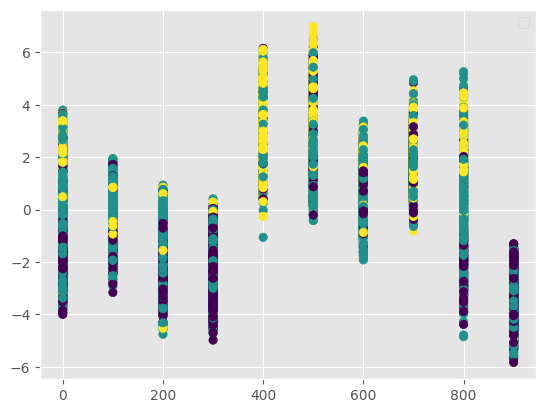

In [310]:
plt.scatter(pred * 100, X_[:, 0], c=y)
plt.legend()

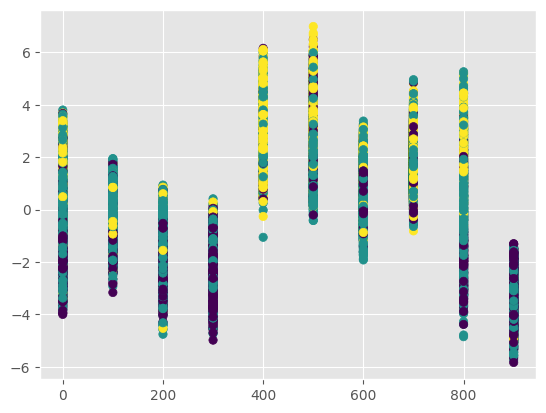

In [307]:
plt.scatter(pred * 100, X_[:, 0], c=y)

In [297]:
cs['cluster']= pred

In [298]:
out = cs.groupby(level=0).agg({'cluster': ['nunique', 'count']})

In [299]:
(out[('cluster', 'nunique')]/out[('cluster', 'count')]).mean()

0.25861

In [ ]:
(out[('cluster', 'nunique')]/out[('cluster', 'count')]).mean()

In [270]:
X_train_trans = ica.transform(X_train)
X_test_trans = ica.transform(X_test)

In [279]:
mlp = MLPClassifier((256,128), 'relu', early_stopping=True, alpha=0.0001, random_state=0)
mlp.fit(X_train_trans, y_train)
y_pred = mlp.predict_proba(X_test_trans)
pr_auc_score(y_test, y_pred)

0.7002242296698141

In [281]:
y_pred = mlp.predict_proba(ica.transform(X))
pr_auc_score(y, y_pred), y_pred[z][:, 0].mean()

(0.7718340699231082, 0.2936035002333917)

In [272]:
y_pred = mlp.predict_proba(X_train_trans)
pr_auc_score(y_train, y_pred)

0.7905586919104804

In [273]:
mlp = MLPClassifier((256,128), 'relu', early_stopping=True, alpha=0.0001, random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict_proba(X_test)
pr_auc_score(y_test, y_pred)

0.7057080723054941

In [278]:
y_pred = mlp.predict_proba(X)
pr_auc_score(y, y_pred), y_pred[z][:, 0].mean()

(0.7575744173537672, 0.28612772722219415)

In [266]:
z.shape, y_pred.shape

((100000,), (41188, 2))

<bound method KMeans.predict of KMeans(n_clusters=5)>

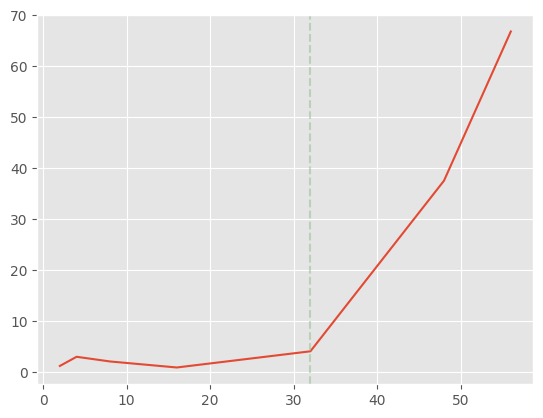

In [46]:
dataset = 'term_deposits'
x, y = load_scores('ica_' + dataset)
plt.plot(x, y[1], label='PCA')
plt.axvline(32, c='darkseagreen', ls='--', alpha=0.5)

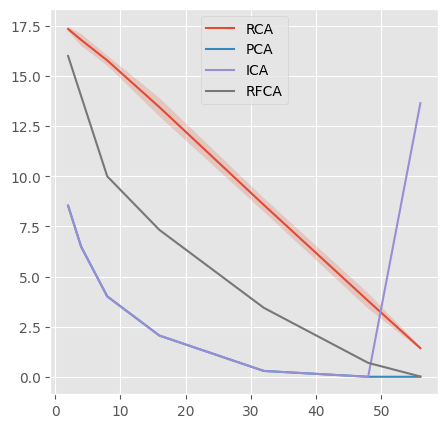

In [9]:
plt.style.use('ggplot')

plt.figure(figsize=(5,5))

dataset = 'term_deposits'
var = 0

x, y = load_scores('rca_' + dataset, var)
plt.plot(x, y[var], label='RCA')
plt.fill_between(
    x,
    y[var] - y[var+1],
    y[var] + y[var+1],
    alpha=0.2,
)

x, y = load_scores('pca_' + dataset, var)
plt.plot(x, y[var], label='PCA')

x, y = load_scores('ica_' + dataset, var)
plt.plot(x, y[var], label='ICA')

x, y = load_scores('rfca_' + dataset, var)
plt.plot(x, y[var], label='RFCA')
plt.legend()

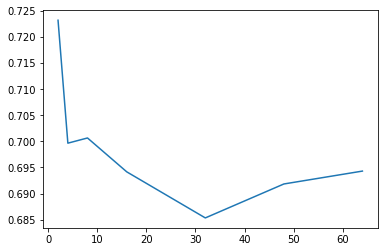

In [307]:
x, y = load_scores('kmeans_term_deposits', 2)
plt.plot(x, y)

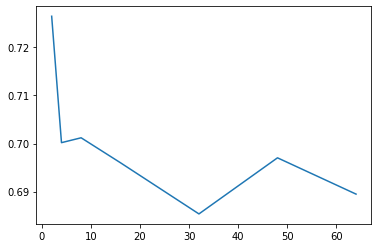

In [308]:
x, y = load_scores('gmm_term_deposits', 2)
plt.plot(x, y)

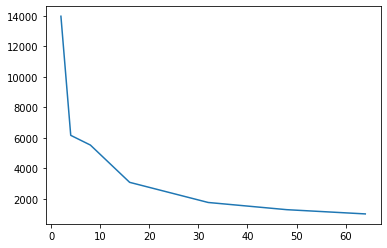

In [309]:
x, y = load_scores('gmm_term_deposits', 1)
plt.plot(x, y)

In [12]:
nclusters, score = load_scores('gmm_term_deposits')

/home/vinit/.local/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GaussianMixture from version 1.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


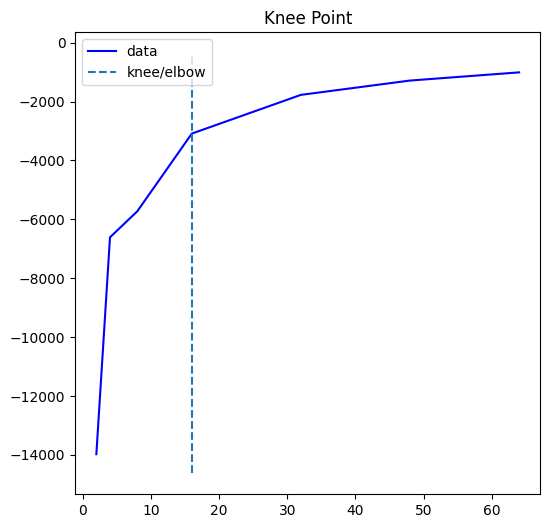

In [13]:
knee = kneed.KneeLocator(nclusters, -np.array(score))
knee.plot_knee()

In [14]:
dataset = 'credit_score'
algo = 'kmeans'

X, y = load_dataset(dataset)
data = pickle.load(open(f"readings/{algo}_{dataset}.pkl", "rb"))

/home/vinit/.local/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/vinit/.local/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator KMeans from version 1.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

def score(X, y, model):
    tree = DecisionTreeClassifier(class_weight='balanced')
    newX = model.predict(X).reshape((-1, 1))
    tree.fit(newX, y)
    return f1_score(y, tree.predict(newX), average='macro')


nclusters = []
scores = []
for n, (model, _) in data.items():
    nclusters.append(n)
    scores.append(score(X, y, model))

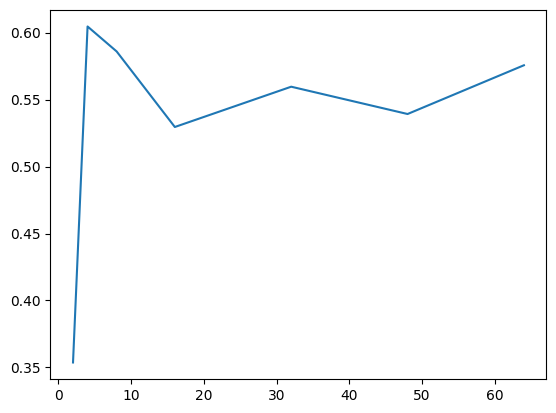

In [16]:
plt.plot(nclusters, scores)

In [90]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [93]:
boost = RandomForestClassifier(max_depth=8, n_estimators=400, n_jobs=16)

In [94]:
boost.fit(X, y)

RandomForestClassifier(max_depth=8, n_estimators=400, n_jobs=16)

In [97]:
from evaluate import *

In [100]:
pca = PCA(16)
X_trans = pca.fit_transform(X)

In [101]:
lr_mean_auc_score(X_trans, y)

0.6211103756389116

In [ ]:
from sklearn.decomposition import PCA, FastICA
from scipy.stats import kurtosis

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [47]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA(random_state=0)
pca.fit_transform(X)

array([[ 1.51055969e+00, -1.59636117e+00, -9.59803637e-01, ...,
        -6.05102859e-16, -1.13147913e-16,  2.07310892e-15],
       [ 1.37619439e+00, -6.52925540e-01, -6.83614378e-01, ...,
        -1.41418307e-16,  1.75530463e-16, -2.19366707e-15],
       [ 2.28288059e+00, -1.32243354e+00, -8.18608962e-01, ...,
        -4.50305999e-16,  1.35269966e-16,  3.28308428e-15],
       ...,
       [-1.56427550e-01, -1.37549147e-01,  2.39977991e+00, ...,
         9.39560229e-18,  4.52774169e-19, -1.67469406e-17],
       [ 1.18215274e+00, -2.59539028e-01, -1.60129613e-01, ...,
         5.75703404e-18,  1.26614569e-19, -1.03685031e-17],
       [ 1.40936361e+00, -3.19682389e-01,  9.34341979e-02, ...,
         5.93319532e-18,  2.85757486e-19, -1.03155195e-17]])

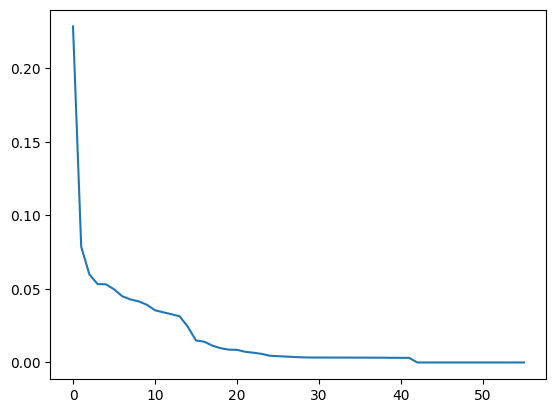

In [68]:
plt.plot(pca.explained_variance_ratio_)

In [69]:
variance = pca.explained_variance_ratio_

In [53]:
pca.fit_transform(X)[:, :3]

array([[ 1.51055969, -1.59636117, -0.95980364],
       [ 1.37619439, -0.65292554, -0.68361438],
       [ 2.28288059, -1.32243354, -0.81860896],
       ...,
       [-0.15642755, -0.13754915,  2.39977991],
       [ 1.18215274, -0.25953903, -0.16012961],
       [ 1.40936361, -0.31968239,  0.0934342 ]])

array([[ 1.51055969e+00, -1.59636117e+00, -9.59803637e-01, ...,
        -6.05102859e-16, -1.13147913e-16,  2.07310892e-15],
       [ 1.37619439e+00, -6.52925540e-01, -6.83614378e-01, ...,
        -1.41418307e-16,  1.75530463e-16, -2.19366707e-15],
       [ 2.28288059e+00, -1.32243354e+00, -8.18608962e-01, ...,
        -4.50305999e-16,  1.35269966e-16,  3.28308428e-15],
       ...,
       [-1.56427550e-01, -1.37549147e-01,  2.39977991e+00, ...,
         9.39560229e-18,  4.52774169e-19, -1.67469406e-17],
       [ 1.18215274e+00, -2.59539028e-01, -1.60129613e-01, ...,
         5.75703404e-18,  1.26614569e-19, -1.03685031e-17],
       [ 1.40936361e+00, -3.19682389e-01,  9.34341979e-02, ...,
         5.93319532e-18,  2.85757486e-19, -1.03155195e-17]])

In [41]:
lr = DecisionTreeClassifier(max_depth=8)

In [ ]:
boost.feature_importances_

In [74]:
for n in [2, 4, 8, 16, 32, 48, 64]:
    ica = FastICA(n, whiten='unit-variance')
    ica.fit(X)
    print(n, kurtosis(ica.transform(X), axis=0).sum())

2 -0.9818013933451346
4 34.61240959741494


/home/vinit/.local/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


8 153.25327074794373
16 229.35453912134057
32 312.72513435691997


/home/vinit/.local/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


48 148.1583632539504


/home/vinit/.local/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:519: UserWarning: n_components is too large: it will be set to 56
  warnings.warn(
/home/vinit/.local/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


64 5.1724824085214856


In [88]:
pca = FastICA(16)
reconstructed = pca.inverse_transform(pca.fit_transform(X))

In [89]:
(((reconstructed - X)**2).sum(axis=1)).mean()

2.5378296657313535

In [297]:
t = """2 -0.4906784161475022
4 8.652832398926428
8 19.318156970636498
16 14.334657714354384
32 9.677557957785847
48 7.977143117745374
64 3.0980037902029656""".split('\n')

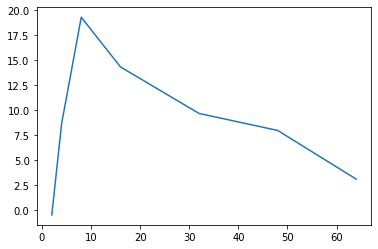

In [300]:
plt.plot(*list(zip(*[list(map(float, a.split(' '))) for a in t])))

In [238]:
kurtosis(X, axis=0).mean()

6.612601325346887

In [295]:
ica.mean_.shape

(56,)

In [236]:
((X - X.mean(axis=0))**4).mean()

4.400292254367207

In [268]:
mean2

0.11261931621674294

6.612601325346887

In [240]:
((X - X.mean(axis=0))**2).mean(axis=0)**2

array([0.00345479, 0.00354161, 0.00341786, 0.00326782, 0.00353641,
       0.00335567, 0.00326581, 0.00377327, 0.00315421, 0.00347538,
       0.00341479, 0.00309314, 0.00348363, 0.00339742, 0.00306768,
       0.00430767, 0.02366422, 0.03390792, 0.05369335, 0.02597454,
       0.0111626 , 0.05265029, 0.06222978, 0.00493141, 0.01401463,
       0.02091924, 0.01010838, 0.00872019, 0.01425571, 0.0361147 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.722466  , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.976144  , 1.        ,
       1.        , 0.8648628 , 1.        , 0.96108612, 1.        ,
       0.91242614])

In [76]:
n_clusters = [2, 4, 8, 16, 32, 48, 64]
score = []

for k in n_clusters:
    kmeans = KMeans(k)
    y_pred = kmeans.fit_predict(X)
    score.append(calinski_harabasz_score(X, y_pred))
    print(k, score[-1])

2 14036.82471492004
4 8366.613520562352
8 5727.639141203562
16 3559.4197891812605
32 2174.316292276627
48 1614.526480523732
64 1309.7117479168016


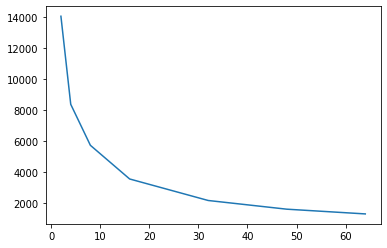

In [77]:
plt.plot(n_clusters, score)

In [81]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Knee:  16


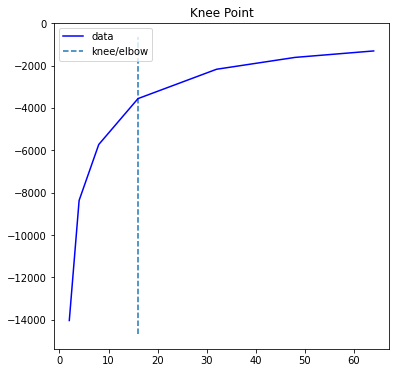

In [99]:
kneedle = kneed.KneeLocator(n_clusters, -np.array(score))
print('Knee: ', kneedle.knee)
kneedle.plot_knee()

Knee:  16


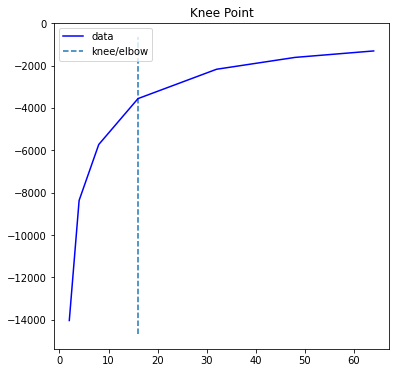

In [4]:
n_clusters = [2, 4, 8, 16, 32, 48, 64]
score = []

for k in n_clusters:
    gmm = GaussianMixture(k)
    y_pred = gmm.fit_predict(X)
    score.append(calinski_harabasz_score(X, y_pred))
    print(k, score[-1])

2 16565.564175976113
4 7129.741527051317
8 3576.4626756020366
16 1643.3287382728386
32 1085.8128001439088
64 555.9431047127802


KeyboardInterrupt: 

In [9]:
pca = PCA()
pca.fit_transform(X);

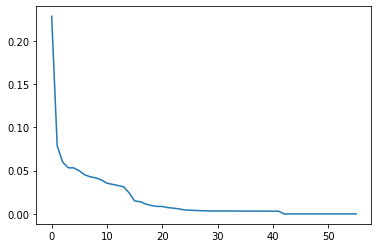

In [12]:
plt.plot(pca.explained_variance_ratio_)

In [58]:
pca = PCA(32)
X_trans = pca.fit_transform(X);

In [14]:
n_clusters = [2, 4, 8, 16, 32, 48, 64]
score = []

for k in n_clusters:
    kmeans = KMeans(k)
    y_pred = kmeans.fit_predict(X_trans)
    score.append(calinski_harabasz_score(X_trans, y_pred))
    print(k, score[-1])

2 23516.187156809403
4 13184.379803284583
8 8713.024996834318
16 6298.197070555686
32 4401.962572090256
48 3578.901351359332
64 2976.4235874930596


In [69]:
kmeans = KMeans(16)
kmeans.fit(X_trans)

KMeans(n_clusters=16)

In [61]:
y_pred.shape

(100000, 1)

In [63]:
y_pred = kmeans.predict_proba(X_trans)

In [64]:
y_pred.shape

(100000, 16)

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lr = LogisticRegression()
lr.fit(y_pred, y)
lr.score(y_pred, y)

0.59101

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
y_pred = kmeans.predict(X_trans).reshape((-1, 1))

In [71]:
lr = DecisionTreeClassifier()
lr.fit(y_pred, y)
lr.score(y_pred, y)

0.62841

In [30]:
acc = 0
tot = 0
for cluster_id in set(y_pred):
    tot += sum(y_pred == cluster_id)
    acc += np.eye(3)[y][y_pred == cluster_id].sum(axis=0).max()
acc/tot

0.62648

In [ ]:
error = np.sum((preds - X_train)**2, axis=1)
error.shape

In [ ]:
kmeans.cluster_centers_

In [ ]:
pca = PCA()
X2 = pca.fit_transform(X_train)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(X2[:,0], X2[:, 1], c=y_train)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE()
X2 = tsne.fit_transform(X_train)

In [ ]:
plt.scatter(X2[:,0], X2[:, 1], c=y_train)